In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
batch_size = 100
num_classes = 2
epochs = 1000

In [4]:
csvfile = 'Data3.csv'
dat = np.loadtxt(csvfile, delimiter=';')
dat

array([[ 1.24822988,  1.17558926,  1.        ],
       [ 3.94969529,  3.86616438, -1.        ],
       [ 2.10952868,  2.0931219 ,  1.        ],
       [ 2.06610425,  2.5605405 , -1.        ],
       [ 4.25217339,  3.69810939, -1.        ],
       [ 2.52023855,  1.20366833,  1.        ],
       [ 1.90113709,  1.0451502 ,  1.        ],
       [ 1.10488782,  0.87907679,  1.        ],
       [ 3.77429055,  2.44544113, -1.        ],
       [ 2.46059105,  0.93488713,  1.        ],
       [ 0.44382666,  2.24505144,  1.        ],
       [ 1.92075136,  1.59524579,  1.        ],
       [-0.66834813,  2.31833982,  1.        ],
       [ 0.27768176,  0.00712491,  1.        ],
       [ 0.79718746,  1.87204283,  1.        ],
       [ 1.51474144,  4.03397433, -1.        ],
       [ 4.11906238,  2.80756053, -1.        ],
       [-1.25666813,  1.49218372,  1.        ],
       [ 2.07096093,  2.45660641, -1.        ],
       [ 2.53668959, -0.19077101,  1.        ],
       [ 3.52632348,  0.91705277,  1.   

In [12]:
x_train = dat[:,:2]
y_train = dat[:,2:]

In [42]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='softsign'))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.7), metrics=['accuracy'])
model.get_weights()

[array([[-1.110296  ],
        [-0.79168165]], dtype=float32),
 array([0.], dtype=float32)]

In [43]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

In [44]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])
print(model.get_weights())

Test loss:  0.0321023091673851
Test accuracy:  0.550000011920929
[array([[-7.313215],
       [-8.962425]], dtype=float32), array([35.246113], dtype=float32)]


In [45]:
p = model.get_weights()
print("w: ", p)
w=[0,0,0]
w[0]=p[0][0]
w[1]=p[0][1]
w[2]=p[1]

w:  [array([[-7.313215],
       [-8.962425]], dtype=float32), array([35.246113], dtype=float32)]


C:\Users\Daniel\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


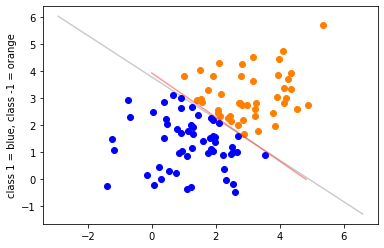

In [46]:
sep_plane = np.array([1.0, 1.3])
sep_plane /= np.linalg.norm(sep_plane) #unit normal vector
sep_line = np.array([1.3, -1.0])
sep_line /= np.linalg.norm(sep_line)
tresh = 3.0
lenLine = 6.0
# Line2D uses x and y coordinate list (instead of point lists)
lx = np.array([(tresh*sep_plane + lenLine*sep_line)[0], (tresh*sep_plane - lenLine*sep_line)[0]])
ly = np.array([(tresh*sep_plane + lenLine*sep_line)[1], (tresh*sep_plane - lenLine*sep_line)[1]])

plt.plot(lx, ly, color='black', alpha=0.2)

for i,d in enumerate(dat):
    if d[:2].dot(sep_plane) < tresh:
        plt.plot(d[0], d[1], 'bo')
    else:
        plt.plot(d[0], d[1], color= '#FF8000', marker='o')
#show line
seplin_x = [0.0, -w[2]/w[0]]
seplin_y = [-w[2]/w[1], 0.0]
plt.plot(seplin_x, seplin_y, color='red', alpha=0.4)

plt.ylabel('class 1 = blue, class -1 = orange')

plt.show()

In [47]:
z = np.hstack((model.predict(x_train), y_train))
res1 = [[1 if abs(x[0]-x[1]) < 1.0 else 0] for x in z]
res05 = [[1 if abs(x[0]-x[1]) < 0.5 else 0] for x in z]
z = np.hstack((z, res1, res05))
z

array([[ 0.93969148,  1.        ,  1.        ,  1.        ],
       [-0.96585757, -1.        ,  1.        ,  1.        ],
       [ 0.51438087,  1.        ,  1.        ,  1.        ],
       [-0.73769838, -1.        ,  1.        ,  1.        ],
       [-0.9666611 , -1.        ,  1.        ,  1.        ],
       [ 0.85769743,  1.        ,  1.        ,  1.        ],
       [ 0.92293233,  1.        ,  1.        ,  1.        ],
       [ 0.95070779,  1.        ,  1.        ,  1.        ],
       [-0.93452567, -1.        ,  1.        ,  1.        ],
       [ 0.89870775,  1.        ,  1.        ,  1.        ],
       [ 0.92235547,  1.        ,  1.        ,  1.        ],
       [ 0.87344933,  1.        ,  1.        ,  1.        ],
       [ 0.95087427,  1.        ,  1.        ,  1.        ],
       [ 0.97071874,  1.        ,  1.        ,  1.        ],
       [ 0.9266758 ,  1.        ,  1.        ,  1.        ],
       [-0.92299223, -1.        ,  1.        ,  1.        ],
       [-0.95247155, -1.